# Spyware and Mass Repression 

**Brave Mugisha**

Please see write-up for more details. 

## Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
import statsmodels.api as sm

## Open and View Datasets

In [2]:
tmk = pd.read_excel('data/tmk_events_release_1.2.xls')
spy = pd.read_excel('data/spyware-forensics.xlsx')

In [3]:
tmk

,country,actor.name,event.name.description,tmk,part.civ.war,civ.war.name,part.int.war,int.war.name,year,is.government.actor,...,trig.inst.oth.con.gov,trig.inst.oth.con.targ,tmk_id,duration,tmk.ordinal,intent.4a.any,intent.4b.any,tmk.ordinal.max,genpol.ongoing,genpol.onset
0,India,Arya Samaj,Partition communal violence,1,0,NaN,0,NaN,1946,0,...,NaN,NaN,India-Arya Samaj-1946,1,4,1,0,4,1,1
1,India,Muslim League,Partition communal violence,1,0,NaN,0,NaN,1946,0,...,1.0,0.0,India-Muslim League-1946,1,8,1,1,8,1,1
2,India,RSS,Partition communal violence,1,0,NaN,0,NaN,1946,0,...,NaN,NaN,India-RSS-1946,1,6,1,1,6,1,1
3,China,Communist Party of China,Land Reform Campaign,1,1,Chinese Civil War,0,NaN,1947,0,...,NaN,NaN,China-Communist Party of China-1947,1,8,1,1,8,1,1
4,India/Pakistan,Akali Dal/SGPC,Partition communal violence,1,0,NaN,0,NaN,1947,0,...,NaN,NaN,India-Akali Dal/SGPC-1947,1,8,1,1,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,Ethiopia,OLF,Oromia Conflict,1,0,NaN,0,NaN,2022,0,...,NaN,NaN,Ethiopia-OLF,1,1,0,0,1,0,0
542,Ethiopia,Fano,Oromia Conflict,1,0,NaN,0,NaN,2022,0,...,NaN,NaN,Ethiopia-Fano,1,1,0,0,1,0,0
543,Mali,Government of Mali,Moura Massacre,1,0,NaN,0,NaN,2022,1,...,0.0,0.0,Mali-Government of Mali-2022,1,1,0,0,1,0,0
544,Myanmar,Government of Myanmar (Burma),Myanmar civil war,1,1,Myanmar civil war,0,NaN,2022,1,...,NaN,NaN,Myanmar-Government of Myanmar 2022,2,1,0,0,2,0,0


In [4]:
spy

,Country of deployment,Region,V-Dem Electoral Democracy Index 2021,Digital Repression Index 2021,V-Dem Regime Type 2021,Category of technology,Period of use,Year of disclosure,Commercial Entity,Country of origin,...,Lower confidence sources,Source 1,Source 2,Source 3,Source 4,Source 5,Source 6,Source 7,Unnamed: 19,Unnamed: 20
0,Angola,AF,0.351,-0.251762,EA,Spyware,2014,2015,FinFisher,Germany,...,x,https://citizenlab.ca/2015/10/mapping-finfishe...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Argentina,WH,0.819,-1.131260,ED,Digital forensics,2010s - present,2021,Cellebrite,Israel,...,NaN,https://freedomhouse.org/country/argentina/fre...,https://www.accessnow.org/cms/assets/uploads/2...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Armenia,EUR,0.739,-0.574160,ED,Spyware,NaN,2021,Cytrox,"Israel, Hungary",...,NaN,https://blog.google/threat-analysis-group/prot...,https://about.fb.com/news/2021/12/taking-actio...,https://citizenlab.ca/2021/12/pegasus-vs-preda...,NaN,NaN,NaN,NaN,NaN,NaN
3,Azerbaijan,EUR,0.194,1.236695,EA,Spyware,2013,2014,Hacking Team,Italy,...,NaN,https://citizenlab.ca/2014/02/mapping-hacking-...,https://web.archive.org/web/20220205005938/htt...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Azerbaijan,EUR,0.194,1.236695,EA,Spyware,2019-2021,2021,NSO Group,Israel,...,NaN,https://www.rferl.org/a/azerbaijan-pegasus-spy...,https://www.occrp.org/en/the-pegasus-project/l...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Venezuela,WH,0.219,1.680778,EA,Digital forensics,2013-present,2020,Cellebrite,Israel,...,NaN,https://www.haaretz.com/israel-news/tech-news/...,https://www.itempnews.org/2022/02/20/cellebrit...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,Venezuela,WH,0.219,1.680778,EA,Spyware,NaN,2015,FinFisher,Germany,...,NaN,https://citizenlab.ca/2015/10/mapping-finfishe...,https://freedomhouse.org/country/venezuela/fre...,https://www.accessnow.org/cms/assets/uploads/2...,NaN,NaN,NaN,NaN,NaN,NaN
190,Vietnam,EAP,0.220,0.891468,CA,Spyware,NaN,2021,Cytrox,"Israel, Hungary",...,x,http://web.archive.org/web/20220105210234/http...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,Vietnam,EAP,0.220,0.891468,CA,Spyware,NaN,2013,FinFisher,Germany,...,NaN,https://citizenlab.ca/storage/finfisher/final/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Isolate Variables of Interest and Merge

In [5]:
#Filter tmk to time range of 2011 to 2022; 
tmk_2011_2022 = tmk[(tmk['year'] >= 2000) & (tmk['year'] <= 2022)]
tmk_2011_2022

,country,actor.name,event.name.description,tmk,part.civ.war,civ.war.name,part.int.war,int.war.name,year,is.government.actor,...,trig.inst.oth.con.gov,trig.inst.oth.con.targ,tmk_id,duration,tmk.ordinal,intent.4a.any,intent.4b.any,tmk.ordinal.max,genpol.ongoing,genpol.onset
427,Afghanistan,Government of Afghanistan,Afghan Civil War,1,1,Afghan Civil War,0,NaN,2000,1,...,NaN,NaN,Afghanistan-Government of Afghanistan-1997,4,2,1,1,7,1,0
428,Burundi,Government of Burundi,Burundian Civil War,1,1,Burundian Civil War,0,NaN,2000,1,...,0.0,NaN,Burundi-Government of Burundi-1995,6,2,1,1,7,1,0
429,Colombia,AUC,AUC vigilantism,1,0,NaN,0,NaN,2000,0,...,NaN,NaN,Colombia-AUC-1997,4,6,1,1,6,1,0
430,India,NLFT,NLFT insurgency,1,0,NaN,0,NaN,2000,0,...,NaN,NaN,India-NLFT-1998,3,1,0,0,1,0,0
431,India,Ranvir Sena,Ranvir Sena political killings,1,0,NaN,0,NaN,2000,0,...,NaN,NaN,India-Ranvir Sena-1999,2,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,Ethiopia,OLF,Oromia Conflict,1,0,NaN,0,NaN,2022,0,...,NaN,NaN,Ethiopia-OLF,1,1,0,0,1,0,0
542,Ethiopia,Fano,Oromia Conflict,1,0,NaN,0,NaN,2022,0,...,NaN,NaN,Ethiopia-Fano,1,1,0,0,1,0,0
543,Mali,Government of Mali,Moura Massacre,1,0,NaN,0,NaN,2022,1,...,0.0,0.0,Mali-Government of Mali-2022,1,1,0,0,1,0,0
544,Myanmar,Government of Myanmar (Burma),Myanmar civil war,1,1,Myanmar civil war,0,NaN,2022,1,...,NaN,NaN,Myanmar-Government of Myanmar 2022,2,1,0,0,2,0,0


## Pre-process

In [6]:
# Remove cumbersome variables from tmk2011_2022 and spy

#tmk first
# List of relevant variables to retain
relevant_variables_tmk = [
    'country',                   # Country where the TMK occurred
    'year',                      # Year of observation
    'actor.name',                # Name of the perpetrator
    'tmk_id',                    # Unique identifier for TMK episodes
    'duration',                  # Duration of the TMK episode
    'part.civ.war',              # Was the episode part of a civil war
    'part.int.war',              # Was the episode part of an interstate war
    'intent.4.a.actor.org.pln',  # Evidence of organizational plans for killings
    'intent.4.b.actor.stat.int', # Evidence of leaders' intent for killings
    'deaths.est',                # Annual deaths estimate
    'total.deaths',              # Total deaths in the episode
    'tmk.ordinal',               # Ordinal scale for TMK severity
    'genpol.ongoing',            # Ongoing genocide/politicide indicator
    'group1.name',               # Name of the primary targeted group
    'group1.best.fatalities.estimate', # Best estimate of fatalities in the group
    'group1.tmk.eth',            # Was the group defined by ethnicity
    'group1.tmk.rel',            # Was the group defined by religion
    'group1.tmk.pol',            # Was the group defined by political affiliation
    'tmk.end.type',              # Description of how the TMK ended
    'tmk.end.type.military',     # Did the episode end with military defeat
    'tmk.end.type.peace',        # Was the episode resolved with a peace agreement
    'trig',                      # Indicator for a triggering event
    'trig.crac.prot',            # Did the trigger involve a crackdown on protests
    'trig.to.host.pop'           # Did the trigger involve takeover of hostile populations
]

# Filter the dataframe to include only the relevant variables
filtered_tmk = tmk_2011_2022[relevant_variables_tmk]

In [7]:
filtered_tmk

,country,year,actor.name,tmk_id,duration,part.civ.war,part.int.war,intent.4.a.actor.org.pln,intent.4.b.actor.stat.int,deaths.est,...,group1.best.fatalities.estimate,group1.tmk.eth,group1.tmk.rel,group1.tmk.pol,tmk.end.type,tmk.end.type.military,tmk.end.type.peace,trig,trig.crac.prot,trig.to.host.pop
427,Afghanistan,2000,Government of Afghanistan,Afghanistan-Government of Afghanistan-1997,4,1,0,0,0,152.0,...,152.0,1.0,1.0,1.0,Invasion of Afghanistan changed government nov...,1.0,0.0,1.0,NaN,NaN
428,Burundi,2000,Government of Burundi,Burundi-Government of Burundi-1995,6,1,0,0,0,408.0,...,389.0,1.0,0.0,0.0,Arusha Peace Agreement,0.0,1.0,1.0,0.0,0.0
429,Colombia,2000,AUC,Colombia-AUC-1997,4,0,0,1,1,656.0,...,551.0,0.0,0.0,1.0,Continued into 2001,NaN,NaN,0.0,NaN,NaN
430,India,2000,NLFT,India-NLFT-1998,3,0,0,0,0,64.0,...,64.0,1.0,0.0,0.0,Change in patterns of killings after 2000,NaN,NaN,0.0,NaN,NaN
431,India,2000,Ranvir Sena,India-Ranvir Sena-1999,2,0,0,0,0,35.0,...,35.0,0.0,0.0,1.0,Low activity,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,Ethiopia,2022,OLF,Ethiopia-OLF,1,0,0,0,0,822.0,...,115.0,1.0,NaN,NaN,ongoing,NaN,NaN,0.0,NaN,NaN
542,Ethiopia,2022,Fano,Ethiopia-Fano,1,0,0,0,0,286.0,...,237.0,1.0,NaN,NaN,ongoing,NaN,NaN,0.0,NaN,NaN
543,Mali,2022,Government of Mali,Mali-Government of Mali-2022,1,0,0,0,0,500.0,...,NaN,1.0,NaN,NaN,ongoing,NaN,NaN,1.0,0.0,0.0
544,Myanmar,2022,Government of Myanmar (Burma),Myanmar-Government of Myanmar 2022,2,1,0,0,0,662.0,...,616.0,NaN,NaN,1.0,ongoing,NaN,NaN,1.0,NaN,NaN


In [8]:
# Remove cumbersome variables from tmk2011_2022 and spy

#spy second
relevant_variables_spyware = [
    'Country of deployment',              # Country where spyware is deployed
    'V-Dem Electoral Democracy Index 2021', # Electoral democracy index
    'Digital Repression Index 2021',      # Digital repression measure
    'V-Dem Regime Type 2021',             # Regime type classification
    'Category of technology',             # Spyware or digital forensics
    'Commercial Entity',                  # Company producing the spyware
    'Period of use',                      # Timeframe of use
    'Year of disclosure',                 # Year of public disclosure
]

# Filter the dataframe to include only the relevant variables
filtered_spyware = spy[relevant_variables_spyware]
filtered_spyware.rename(columns={"Country of deployment": "country"}, inplace=True)


# Parse period of use

def parse_period(period):
    if pd.isna(period):
        return pd.NA, pd.NA
    years = period.split('-')
    if len(years) == 1:
        return years[0], pd.NA  # Only a start year is given
    return years[0], years[1]  # Both start and end years are given

# Apply the parsing function
filtered_spyware['Period of use'] = filtered_spyware['Period of use'].astype(str)
filtered_spyware[['Start Year', 'End Year']] = filtered_spyware['Period of use'].apply(parse_period).apply(pd.Series)

/var/folders/sh/qqgqm8310y16f6l4xyys6l140000gn/T/ipykernel_25149/310618891.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_spyware.rename(columns={"Country of deployment": "country"}, inplace=True)
/var/folders/sh/qqgqm8310y16f6l4xyys6l140000gn/T/ipykernel_25149/310618891.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_spyware['Period of use'] = filtered_spyware['Period of use'].astype(str)
/var/folders/sh/qqgqm8310y16f6l4xyys6l140000gn/T/ipykernel_25149/310618891.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [9]:
filtered_spyware

,country,V-Dem Electoral Democracy Index 2021,Digital Repression Index 2021,V-Dem Regime Type 2021,Category of technology,Commercial Entity,Period of use,Year of disclosure,Start Year,End Year
0,Angola,0.351,-0.251762,EA,Spyware,FinFisher,2014,2015,2014,<NA>
1,Argentina,0.819,-1.131260,ED,Digital forensics,Cellebrite,2010s - present,2021,2010s,present
2,Armenia,0.739,-0.574160,ED,Spyware,Cytrox,nan,2021,nan,<NA>
3,Azerbaijan,0.194,1.236695,EA,Spyware,Hacking Team,2013,2014,2013,<NA>
4,Azerbaijan,0.194,1.236695,EA,Spyware,NSO Group,2019-2021,2021,2019,2021
...,...,...,...,...,...,...,...,...,...,...
188,Venezuela,0.219,1.680778,EA,Digital forensics,Cellebrite,2013-present,2020,2013,present
189,Venezuela,0.219,1.680778,EA,Spyware,FinFisher,nan,2015,nan,<NA>
190,Vietnam,0.220,0.891468,CA,Spyware,Cytrox,nan,2021,nan,<NA>
191,Vietnam,0.220,0.891468,CA,Spyware,FinFisher,nan,2013,nan,<NA>


### Merge

In [10]:
# Merge the datasets on country and year
merged_data = pd.merge(filtered_tmk, filtered_spyware, on=["country"], how="inner")

In [11]:
merged_data

,country,year,actor.name,tmk_id,duration,part.civ.war,part.int.war,intent.4.a.actor.org.pln,intent.4.b.actor.stat.int,deaths.est,...,trig.to.host.pop,V-Dem Electoral Democracy Index 2021,Digital Repression Index 2021,V-Dem Regime Type 2021,Category of technology,Commercial Entity,Period of use,Year of disclosure,Start Year,End Year
0,Colombia,2000,AUC,Colombia-AUC-1997,4,0,0,1,1,656.0,...,NaN,0.645,0.767802,ED,Digital forensics,AccessData,nan,2015,nan,<NA>
1,Colombia,2000,AUC,Colombia-AUC-1997,4,0,0,1,1,656.0,...,NaN,0.645,0.767802,ED,Spyware,Cytrox,nan,2021,nan,<NA>
2,Colombia,2000,AUC,Colombia-AUC-1997,4,0,0,1,1,656.0,...,NaN,0.645,0.767802,ED,Spyware,Hacking Team,2013-2014,2014,2013,2014
3,Colombia,2000,AUC,Colombia-AUC-1997,4,0,0,1,1,656.0,...,NaN,0.645,0.767802,ED,Spyware,Mollitiam,nan,2021,nan,<NA>
4,India,2000,NLFT,India-NLFT-1998,3,0,0,0,0,64.0,...,NaN,0.444,1.012874,EA,Digital forensics,Cellebrite,nan,2020,nan,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Myanmar,2022,Government of Myanmar (Burma),Myanmar-Government of Myanmar 2022,2,1,0,0,0,662.0,...,NaN,0.126,2.014614,CA,Digital forensics,SalvationData,2019-2020,2021,2019,2020
147,Myanmar,2022,Government of Myanmar (Burma),Myanmar-Government of Myanmar 2022,2,1,0,0,0,662.0,...,NaN,0.126,2.014614,CA,Digital forensics,SecurCube,2019-2020,2021,2019,2020
148,Myanmar,2022,Government of Myanmar (Burma),Myanmar-Government of Myanmar 2022,2,1,0,0,0,662.0,...,NaN,0.126,2.014614,CA,Digital forensics,Silicon Forensics,2020-2021,2021,2020,2021
149,Myanmar,2022,Government of Myanmar (Burma),Myanmar-Government of Myanmar 2022,2,1,0,0,0,662.0,...,NaN,0.126,2.014614,CA,Digital forensics,Sirchie,2020-2021,2021,2020,2021


In [12]:
merged_data.columns

Index(['country', 'year', 'actor.name', 'tmk_id', 'duration', 'part.civ.war',
       'part.int.war', 'intent.4.a.actor.org.pln', 'intent.4.b.actor.stat.int',
       'deaths.est', 'total.deaths', 'tmk.ordinal', 'genpol.ongoing',
       'group1.name', 'group1.best.fatalities.estimate', 'group1.tmk.eth',
       'group1.tmk.rel', 'group1.tmk.pol', 'tmk.end.type',
       'tmk.end.type.military', 'tmk.end.type.peace', 'trig', 'trig.crac.prot',
       'trig.to.host.pop', 'V-Dem Electoral Democracy Index 2021',
       'Digital Repression Index 2021', 'V-Dem Regime Type 2021',
       'Category of technology', 'Commercial Entity', 'Period of use',
       'Year of disclosure', 'Start Year', 'End Year'],
      dtype='object')

In [13]:
# Specify the desired order
desired_order = ['country', 'year', 'Period of use','Year of disclosure', 'V-Dem Electoral Democracy Index 2021',
                'Digital Repression Index 2021', 'V-Dem Regime Type 2021',
                'Category of technology', 'actor.name', 'tmk_id', 'duration', 'part.civ.war',
                'part.int.war', 'intent.4.a.actor.org.pln', 'intent.4.b.actor.stat.int',
                'deaths.est', 'total.deaths', 'tmk.ordinal', 'genpol.ongoing',
                'group1.name', 'group1.best.fatalities.estimate', 'group1.tmk.eth',
                'group1.tmk.rel', 'group1.tmk.pol', 'tmk.end.type',
                'tmk.end.type.military', 'tmk.end.type.peace', 'trig', 'trig.crac.prot',
                'trig.to.host.pop', 'Commercial Entity', 'Start Year', 'End Year']

# Reorder the DataFrame
df = merged_data[desired_order]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 33 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   country                               151 non-null    object 
 1   year                                  151 non-null    int64  
 2   Period of use                         151 non-null    object 
 3   Year of disclosure                    151 non-null    object 
 4   V-Dem Electoral Democracy Index 2021  151 non-null    float64
 5   Digital Repression Index 2021         151 non-null    float64
 6   V-Dem Regime Type 2021                151 non-null    object 
 7   Category of technology                151 non-null    object 
 8   actor.name                            151 non-null    object 
 9   tmk_id                                151 non-null    object 
 10  duration                              151 non-null    int64  
 11  part.civ.war       

In [15]:
df

,country,year,Period of use,Year of disclosure,V-Dem Electoral Democracy Index 2021,Digital Repression Index 2021,V-Dem Regime Type 2021,Category of technology,actor.name,tmk_id,...,group1.tmk.pol,tmk.end.type,tmk.end.type.military,tmk.end.type.peace,trig,trig.crac.prot,trig.to.host.pop,Commercial Entity,Start Year,End Year
0,Colombia,2000,nan,2015,0.645,0.767802,ED,Digital forensics,AUC,Colombia-AUC-1997,...,1.0,Continued into 2001,NaN,NaN,0.0,NaN,NaN,AccessData,nan,<NA>
1,Colombia,2000,nan,2021,0.645,0.767802,ED,Spyware,AUC,Colombia-AUC-1997,...,1.0,Continued into 2001,NaN,NaN,0.0,NaN,NaN,Cytrox,nan,<NA>
2,Colombia,2000,2013-2014,2014,0.645,0.767802,ED,Spyware,AUC,Colombia-AUC-1997,...,1.0,Continued into 2001,NaN,NaN,0.0,NaN,NaN,Hacking Team,2013,2014
3,Colombia,2000,nan,2021,0.645,0.767802,ED,Spyware,AUC,Colombia-AUC-1997,...,1.0,Continued into 2001,NaN,NaN,0.0,NaN,NaN,Mollitiam,nan,<NA>
4,India,2000,nan,2020,0.444,1.012874,EA,Digital forensics,NLFT,India-NLFT-1998,...,0.0,Change in patterns of killings after 2000,NaN,NaN,0.0,NaN,NaN,Cellebrite,nan,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Myanmar,2022,2019-2020,2021,0.126,2.014614,CA,Digital forensics,Government of Myanmar (Burma),Myanmar-Government of Myanmar 2022,...,1.0,ongoing,NaN,NaN,1.0,NaN,NaN,SalvationData,2019,2020
147,Myanmar,2022,2019-2020,2021,0.126,2.014614,CA,Digital forensics,Government of Myanmar (Burma),Myanmar-Government of Myanmar 2022,...,1.0,ongoing,NaN,NaN,1.0,NaN,NaN,SecurCube,2019,2020
148,Myanmar,2022,2020-2021,2021,0.126,2.014614,CA,Digital forensics,Government of Myanmar (Burma),Myanmar-Government of Myanmar 2022,...,1.0,ongoing,NaN,NaN,1.0,NaN,NaN,Silicon Forensics,2020,2021
149,Myanmar,2022,2020-2021,2021,0.126,2.014614,CA,Digital forensics,Government of Myanmar (Burma),Myanmar-Government of Myanmar 2022,...,1.0,ongoing,NaN,NaN,1.0,NaN,NaN,Sirchie,2020,2021


## Exploratory Data Analysis - Descriptive Analysis

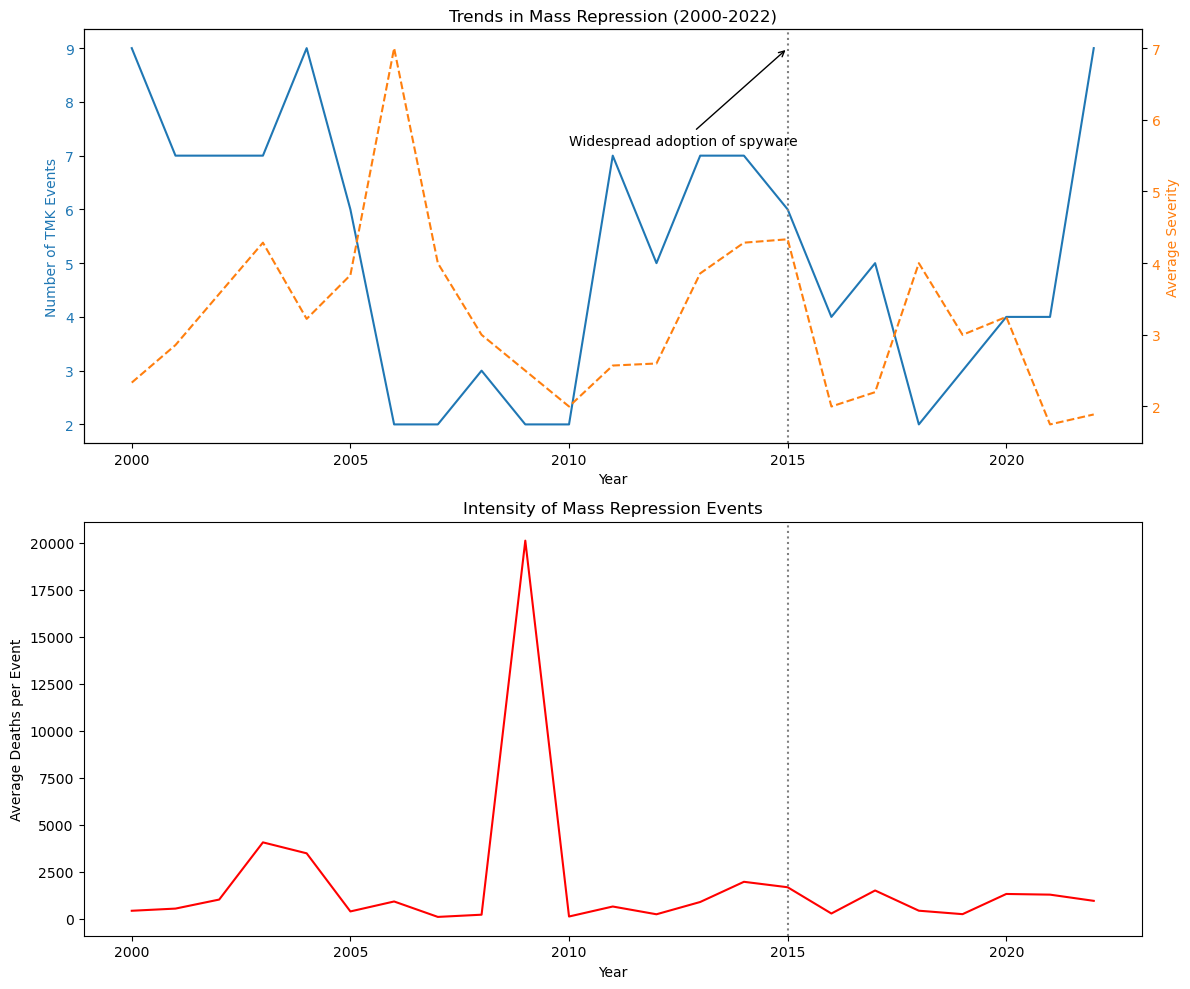


Comparison of Pre-2015 vs Post-2015 periods:

tmk:
Pre-2015 mean: 5.47
Post-2015 mean: 4.62
T-statistic: 0.79
P-value: 0.4406

tmk.ordinal:
Pre-2015 mean: 3.46
Post-2015 mean: 2.80
T-statistic: 1.30
P-value: 0.2065

deaths.est:
Pre-2015 mean: 9706.27
Post-2015 mean: 4900.38
T-statistic: 1.02
P-value: 0.3186


In [16]:
#Yearly summary statistics
yearly_stats = tmk.groupby('year').agg({
    'tmk': 'count',
    'tmk.ordinal': 'mean',
    'deaths.est': 'sum',
}).reset_index()

# Focus on period 2000-2022
yearly_stats = yearly_stats[yearly_stats['year'] >= 2000]

# Create visualization of trends
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Number of events and severity over time
color1, color2 = '#1f77b4', '#ff7f0e'

# Plot number of events
ax1.plot(yearly_stats['year'], yearly_stats['tmk'], color=color1, label='Number of Events')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of TMK Events', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Create second y-axis for severity
ax1_twin = ax1.twinx()
ax1_twin.plot(yearly_stats['year'], yearly_stats['tmk.ordinal'], 
              color=color2, label='Average Severity', linestyle='--')
ax1_twin.set_ylabel('Average Severity', color=color2)
ax1_twin.tick_params(axis='y', labelcolor=color2)

# Add vertical line for start of widespread spyware adoption
ax1.axvline(x=2015, color='gray', linestyle=':', label='Spyware Era')
ax1.set_title('Trends in Mass Repression (2000-2022)')
ax1.annotate("Widespread adoption of spyware", 
             xy=(2015, yearly_stats['tmk'].max()), xycoords='data',
             xytext=(2010, yearly_stats['tmk'].max() * 0.8),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10, color='black')

# Plot 2: Average deaths per event over time
ax2.plot(yearly_stats['year'], yearly_stats['deaths.est'] / yearly_stats['tmk'], 
         color='red', label='Average Deaths per Event')
ax2.set_xlabel('Year')
ax2.set_ylabel('Average Deaths per Event')
ax2.set_title('Intensity of Mass Repression Events')
ax2.axvline(x=2015, color='gray', linestyle=':', label='Spyware Era')

plt.tight_layout()
plt.show()

# Statistical analysis
# Compare pre-2015 and post-2015 periods
pre_2015 = yearly_stats[yearly_stats['year'] < 2015]
post_2015 = yearly_stats[yearly_stats['year'] >= 2015]

print("\nComparison of Pre-2015 vs Post-2015 periods:")
metrics = ['tmk', 'tmk.ordinal', 'deaths.est']
for metric in metrics:
    t_stat, p_val = stats.ttest_ind(pre_2015[metric], post_2015[metric])
    print(f"\n{metric}:")
    print(f"Pre-2015 mean: {pre_2015[metric].mean():.2f}")
    print(f"Post-2015 mean: {post_2015[metric].mean():.2f}")
    print(f"T-statistic: {t_stat:.2f}")
    print(f"P-value: {p_val:.4f}")

## Correlation Analysis

In [17]:
correlation_matrix = df[['tmk.ordinal', 'Digital Repression Index 2021']].corr()
correlation_matrix

,tmk.ordinal,Digital Repression Index 2021
tmk.ordinal,1.000000,-0.178497
Digital Repression Index 2021,-0.178497,1.000000


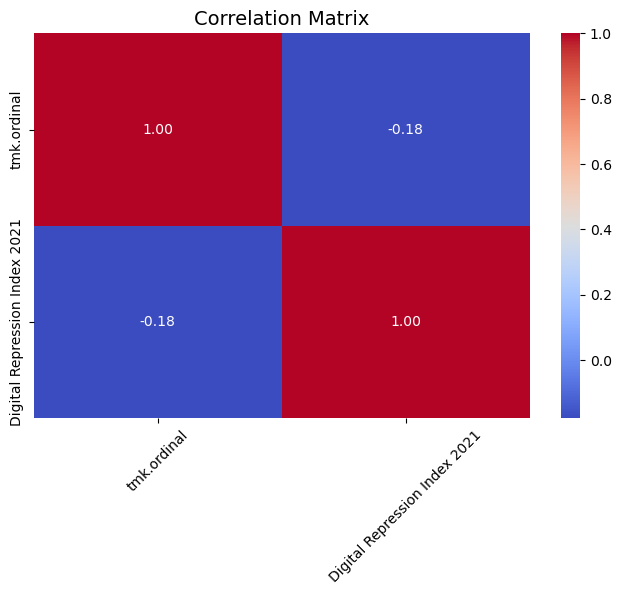

In [18]:
# Visualizing correlations using heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix", fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [19]:
# Pairwise Pearson correlation between TMK severity and digital repression
pearson_corr_tmk_dri, p_tmk_dri = pearsonr(
    df['tmk.ordinal'].dropna(),
    df['Digital Repression Index 2021'].dropna()
)

# Output correlation insights and regression results
correlation_results = {
    "Pearson Correlation (TMK Ordinal vs Digital Repression Index)": pearson_corr_tmk_dri,
    "p-value (TMK Ordinal vs Digital Repression Index)": p_tmk_dri
}

pd.DataFrame(correlation_results, index=["Value"])


,Pearson Correlation (TMK Ordinal vs Digital Repression Index),p-value (TMK Ordinal vs Digital Repression Index)
Value,-0.178497,0.02832


## Regression Analysis

In [20]:
# OLS regression

# Regression: Digital Repression Index as a predictor for TMK ordinal severity
X = df[['Digital Repression Index 2021']]
y = df['tmk.ordinal']
X = sm.add_constant(X)  
model = sm.OLS(y, X).fit()
regression_summary = model.summary()
print(regression_summary)

                            OLS Regression Results                            
Dep. Variable:            tmk.ordinal   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     4.904
Date:                Mon, 16 Dec 2024   Prob (F-statistic):             0.0283
Time:                        23:24:55   Log-Likelihood:                -319.36
No. Observations:                 151   AIC:                             642.7
Df Residuals:                     149   BIC:                             648.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         